# FOR BRAIN:

In [27]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional

## Select file + slice

In [69]:


GT_path = '/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed/multicoil_test_full/'
reconstruction_CS_preprocessed_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Preprocessed_CS/multicoil_test/'
reconstruction_CS_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results/CS/'
reconstruction_CS_last_year_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results_lastyear/Reconstructions/CS/'
reconstruction_cs_unet_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results/CSUNet/reconstructions/'
reconstructions_last_year = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results_lastyear/Reconstructions/CSUNet/reconstructions/'

# select all files from cs_unet path in a list
files = os.listdir(reconstruction_cs_unet_path)
print('Number of files in CS UNet reconstruction path:', len(files))

############### FOR KNEE ##############
# select a file also in test set from last year (needs to be from test set)
# search a file that is in folder last year and in the cs_unet folder
file_lastyear = [f for f in os.listdir(reconstructions_last_year) if f in files]
print('Number of brain files in test set:', len(file_lastyear))
file = file_lastyear[6]

print('Selected file:', file)
slice = 8



GT_path = os.path.join(GT_path,file)
#reconstruction_CS_path = os.path.join(reconstruction_CS_path,file.replace('.h5', '_cs.npy'))
reconstruction_CS_path = os.path.join(reconstruction_CS_path,file)
reconstruction_CS_lastyear_path = os.path.join(reconstruction_CS_last_year_path, file)
reconstruction_cs_unet_path = os.path.join(reconstruction_cs_unet_path,file)
reconstructions_last_year = os.path.join(reconstructions_last_year,file)

GT = h5py.File(GT_path, 'r')
#reconstruction_CS = np.load(reconstruction_CS_path)
reconstruction_CS = h5py.File(reconstruction_CS_path, 'r')
reconstruction_CS_lastyear = h5py.File(reconstruction_CS_lastyear_path, 'r')
reconstruction_cs_unet = h5py.File(reconstruction_cs_unet_path, 'r')
reconstructions_last_year = h5py.File(reconstructions_last_year, 'r')

GT = GT['reconstruction_rss']
reconstruction_CS = reconstruction_CS['reconstruction']
reconstruction_CS_lastyear = reconstruction_CS_lastyear['reconstruction']
# print keys of last one
print(reconstruction_cs_unet.keys())
print(reconstructions_last_year.keys())
reconstruction_cs_unet = reconstruction_cs_unet['reconstruction']
reconstructions_last_year = reconstructions_last_year['reconstruction']


GT = np.array(GT)
reconstruction_CS = np.array(reconstruction_CS)
reconstruction_CS_lastyear = np.array(reconstruction_CS_lastyear)
reconstruction_cs_unet = np.array(reconstruction_cs_unet)
reconstructions_last_year = np.array(reconstructions_last_year)

Number of files in CS UNet reconstruction path: 380
Number of brain files in test set: 263
Selected file: file_brain_AXT2_210_6001573.h5
<KeysViewHDF5 ['reconstruction']>
<KeysViewHDF5 ['reconstruction']>


In [289]:
# CS_bitmask = np.ones_like(reconstruction_CS)
# CS_bitmask = np.where(reconstruction_CS != 0, CS_bitmask, 0).astype(int)
# plt.imshow(CS_bitmask[slice], cmap='gray')
# plt.colorbar()


In [74]:
def comp_img(img,crop_size):
    s = img.shape
    start_height = s[1]//2 - (crop_size[1]//2)
    start_width = s[2]//2 - (crop_size[2]//2)
    return img[:,start_height:(start_height+crop_size[1]),start_width:(start_width+crop_size[2])]

dim1 = GT.shape[1]
dim2 = GT.shape[2]
reconstruction_CS = comp_img(reconstruction_CS, (reconstruction_CS.shape[0], dim1,dim2))

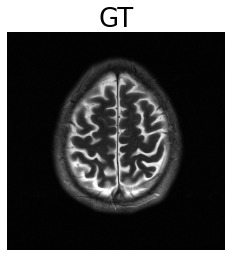

In [75]:
# GT
lower_percentile = 0.15
upper_percentile = 99.85

fig, ax = plt.subplots()
im = ax.imshow(GT[slice], cmap='gray', origin='lower', vmin=np.percentile(GT[slice], lower_percentile), vmax=np.percentile(GT[slice], upper_percentile))
#plt.colorbar(im, ax=ax)
# Increase the font size of the titles
plt.rcParams['axes.titlesize'] = 26
plt.title('GT')
#plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/GT_R=4.png')
ax.axis('off')
plt.show()

In [71]:
vmin, vmax = im.get_clim()

(-0.5, 383.5, -0.5, 383.5)

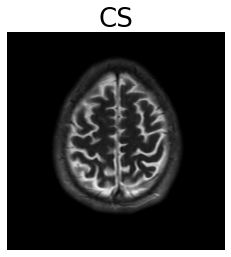

In [76]:
# CS
plt.imshow(np.abs(reconstruction_CS[slice]), cmap='gray', origin='lower', vmin=vmin, vmax=vmax) #  (deleted options gave better contrast)
# plt.colorbar()
plt.rcParams['axes.titlesize'] = 26
plt.title('CS')
plt.axis('off')
#plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/CS_R=8.png')



(-0.5, 395.5, -0.5, 767.5)

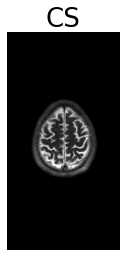

In [77]:
# CS last year
plt.imshow(reconstruction_CS_lastyear[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax) #  (deleted options gave better contrast)
# plt.colorbar()
plt.rcParams['axes.titlesize'] = 26
plt.title('CS')
plt.axis('off')
#plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/CS_R=8.png')

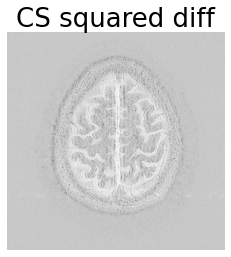

In [78]:
# plot the squared difference between T and reconstruction CS
plt.imshow(np.log((GT[slice]-reconstruction_CS[slice])**2), cmap='gray', origin='lower')
#plt.colorbar()
plt.rcParams['axes.titlesize'] = 26
plt.title('CS squared diff')
plt.axis('off')
#plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/CS_squareddiff_R=8.png')
plt.show()

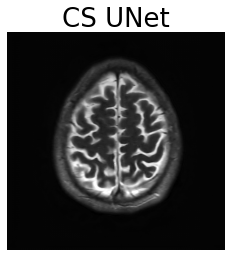

In [79]:
# CS UNet
plt.imshow(reconstruction_cs_unet[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
# plt.colorbar()
plt.rcParams['axes.titlesize'] = 26
plt.title('CS UNet')
plt.axis('off')
#plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/CSUNet_R=8.png')
plt.show()

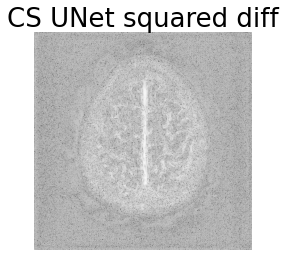

In [80]:
# squared difference between GT and CS UNet
plt.imshow(np.log((GT[slice]-reconstruction_cs_unet[slice])**2), cmap='gray', origin='lower')
#plt.colorbar()
plt.rcParams['axes.titlesize'] = 26
plt.title('CS UNet squared diff')
plt.axis('off')
#plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/CSUNet_squareddiff_R=8.png')
plt.show()

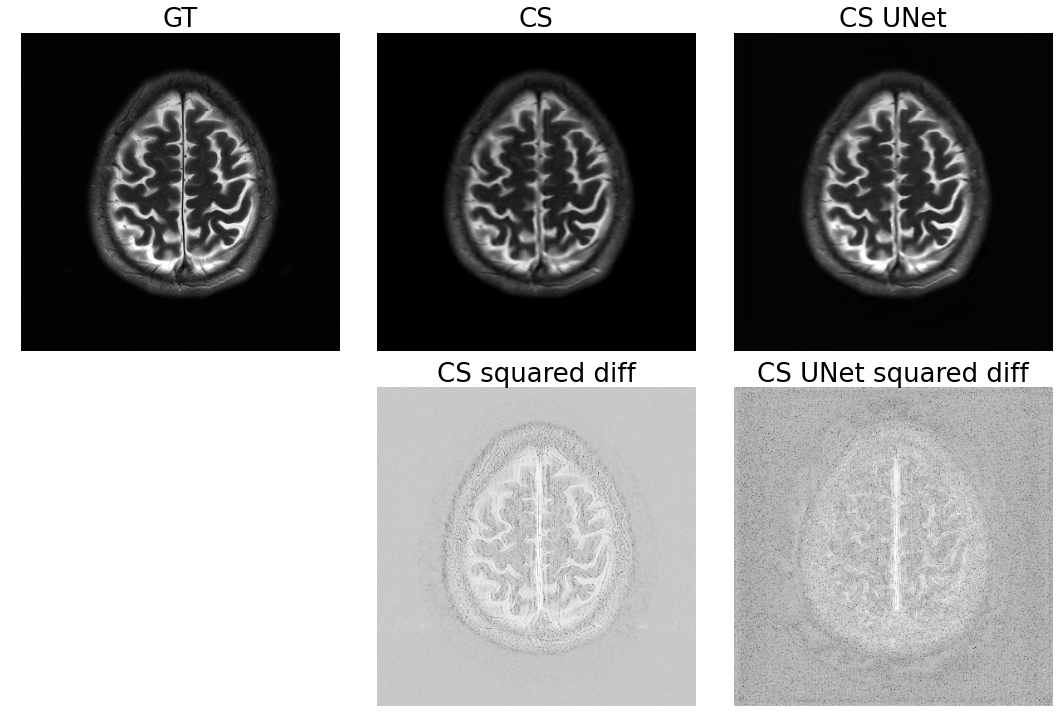

In [81]:
# visualize the 3 next to each other with squared difference of the last 2 under them
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# GT
axs[0, 0].imshow(GT[slice], cmap='gray', origin='lower', vmin=np.percentile(GT[slice], lower_percentile), vmax=np.percentile(GT[slice], upper_percentile))
axs[0, 0].set_title('GT')
axs[0, 0].axis('off')
# CS
axs[0, 1].imshow(reconstruction_CS[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
axs[0, 1].set_title('CS')
axs[0, 1].axis('off')
# CS UNet
axs[0, 2].imshow(reconstruction_cs_unet[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
axs[0, 2].set_title('CS UNet')
axs[0, 2].axis('off')
# CS squared difference
axs[1, 1].imshow(np.log((GT[slice]-reconstruction_CS[slice])**2), cmap='gray', origin='lower')
axs[1, 1].set_title('CS squared diff')  
axs[1, 1].axis('off')
# CS UNet squared difference
axs[1, 2].imshow(np.log((GT[slice]-reconstruction_cs_unet[slice])**2), cmap='gray', origin='lower')
axs[1, 2].set_title('CS UNet squared diff')
axs[1, 2].axis('off')
# Hide the empty subplot
axs[1, 0].axis('off')
# Adjust layout
plt.tight_layout()

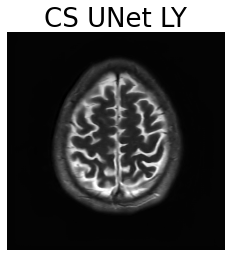

In [82]:
# CSUNET last year
# CS UNet
plt.imshow(reconstructions_last_year[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
# plt.colorbar()
plt.rcParams['axes.titlesize'] = 26
plt.title('CS UNet LY')
plt.axis('off')
#plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/CSUNet_R=8.png')
plt.show()

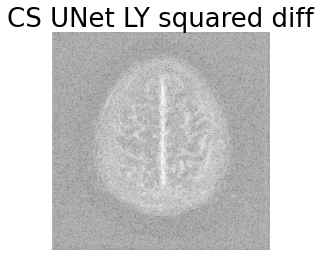

In [83]:
# squared difference between GT and CS UNet
plt.imshow(np.log((GT[slice]-reconstructions_last_year[slice])**2), cmap='gray', origin='lower')
#plt.colorbar()
plt.rcParams['axes.titlesize'] = 26
plt.title('CS UNet LY squared diff')
plt.axis('off')
#plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/CSUNet_squareddiff_R=8.png')
plt.show()

## final plot

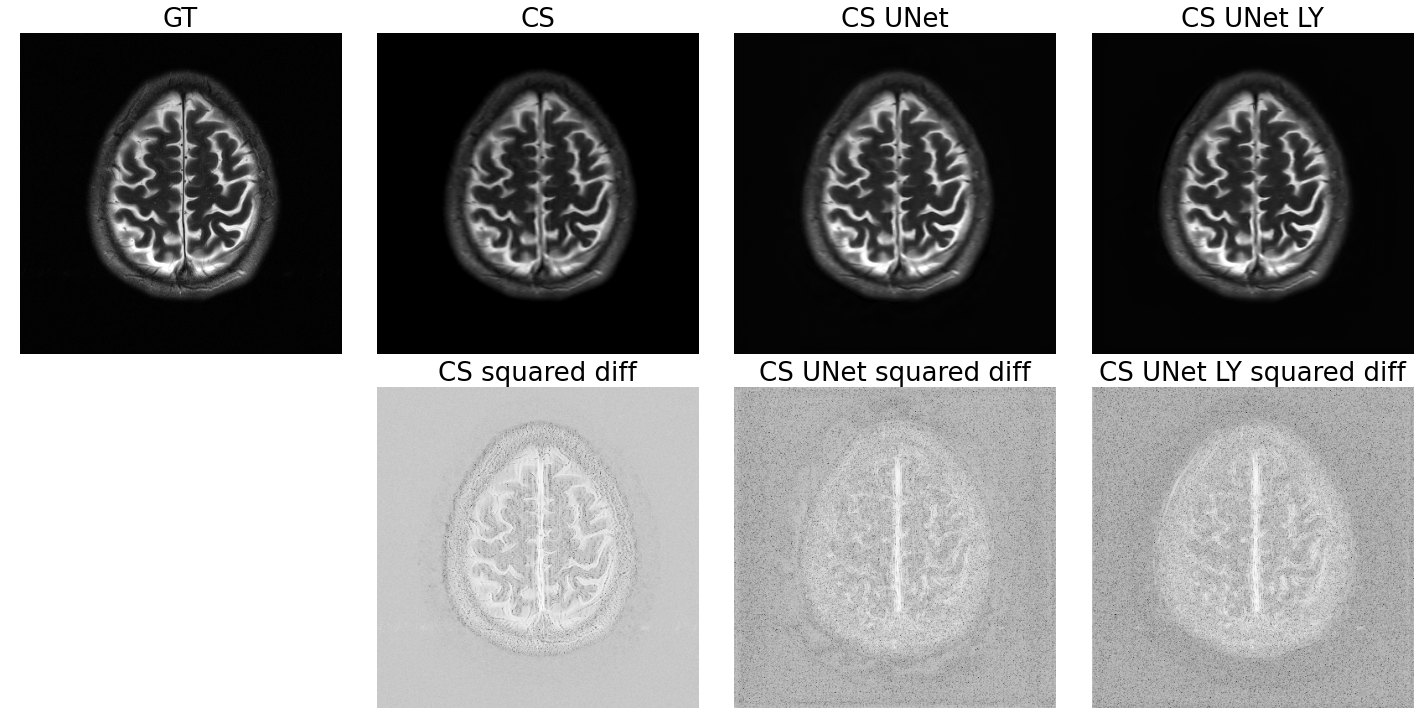

In [84]:
# plot all 4 next to each other with squared difference of the last 3 under them
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
# GT
axs[0, 0].imshow(GT[slice], cmap='gray', origin='lower', vmin=np.percentile(GT[slice], lower_percentile), vmax=np.percentile(GT[slice], upper_percentile))
axs[0, 0].set_title('GT')
axs[0, 0].axis('off')
# CS
axs[0, 1].imshow(reconstruction_CS[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
axs[0, 1].set_title('CS')
axs[0, 1].axis('off')
# CS UNet
axs[0, 2].imshow(reconstruction_cs_unet[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
axs[0, 2].set_title('CS UNet')
axs[0, 2].axis('off')
# CS UNet last year
axs[0, 3].imshow(reconstructions_last_year[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
axs[0, 3].set_title('CS UNet LY')
axs[0, 3].axis('off')
# CS squared difference
axs[1, 1].imshow(np.log((GT[slice]-reconstruction_CS[slice])**2), cmap='gray', origin='lower')
axs[1, 1].set_title('CS squared diff')
axs[1, 1].axis('off')
# CS UNet squared difference
axs[1, 2].imshow(np.log((GT[slice]-reconstruction_cs_unet[slice])**2), cmap='gray', origin='lower')
axs[1, 2].set_title('CS UNet squared diff')
axs[1, 2].axis('off')
# CS UNet last year squared difference
axs[1, 3].imshow(np.log((GT[slice]-reconstructions_last_year[slice])**2), cmap='gray', origin='lower')
axs[1, 3].set_title('CS UNet LY squared diff')
axs[1, 3].axis('off')
# Hide the empty subplot
axs[1, 0].axis('off')
# Adjust layout
plt.tight_layout()
plt.show()